In [1]:
from matplotlib import pyplot as plt
from meta.buy_and_hold_env import BuyAndHoldEnv
from utils.charts.plot_data_with_rsi import plot_data_with_rsi
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.env_checker import check_env

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01', '1d', ['RSI'])

env = BuyAndHoldEnv(data, action_space=2, observation_space=9)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


Step: 1, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 2, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 3, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 4, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 5, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 6, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 7, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 8, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 9, Last Action: 1, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 10, Last Action: 1, Reward: 0, Total Rew

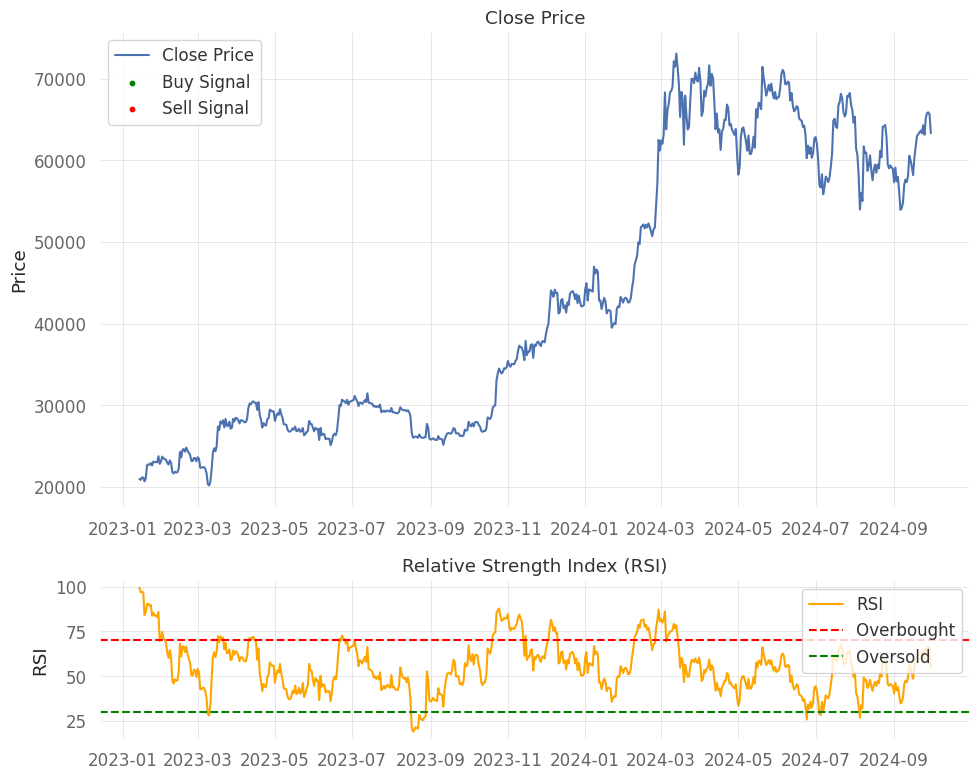

                    Strategy
------------------  ----------
Start Period        2023-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      0.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              -
Prob. Sharpe Ratio  -
Sortino             -
Sortino/√2          -
Omega               -

Max Drawdown        %
Longest DD Days     -

Gain/Pain Ratio     -
Gain/Pain (1M)      -

Payoff Ratio        -
Profit Factor       -
Common Sense Ratio  -
CPC Index           -
Tail Ratio          -
Outlier Win Ratio   -
Outlier Loss Ratio  -

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Recovery Factor     -
Ulcer Index         0.0
Serenity Index      -
Avg. Drawdown Days  -


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/quantstats/stats.py:294: RuntimeWarning: invalid value encountered in scalar divide
  res = returns.mean() / divisor
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


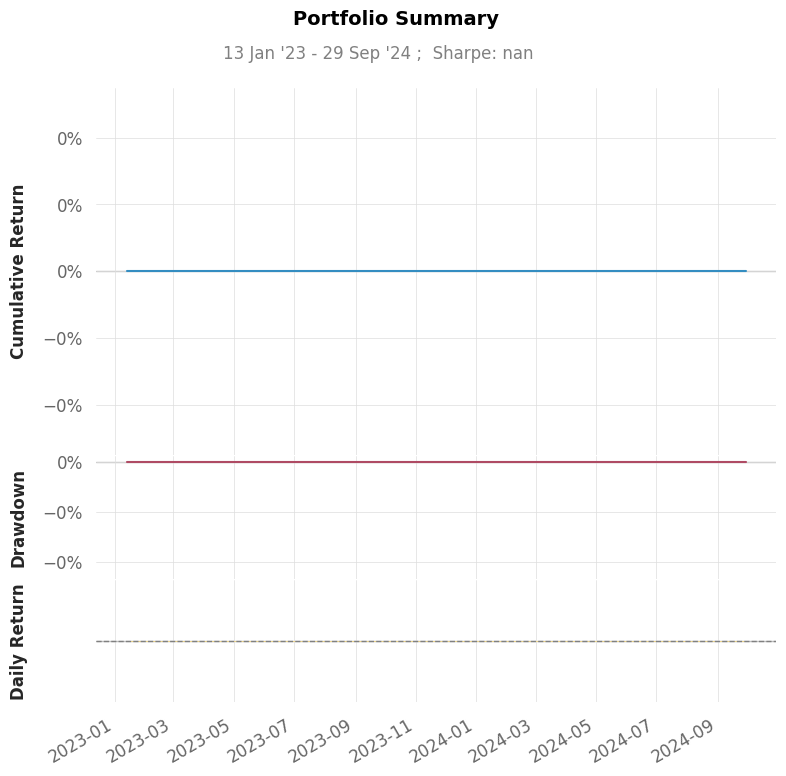

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


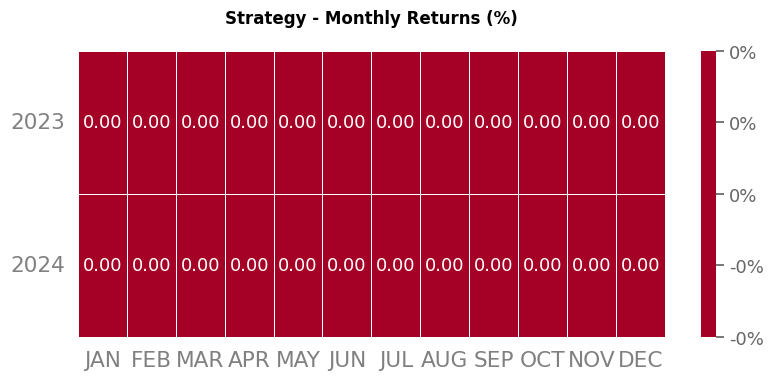

In [2]:
import pandas as pd
import quantstats as qs

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-10-01', '1d', ['RSI'])

test_env = BuyAndHoldEnv(test_data, action_space=3, observation_space=9)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation, deterministic=True)
    done, info = test_env.test_step(action)
    
    test_env.render()
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)

Step: 1, Last Action: 0, Reward: 1, Total Reward: 1.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.04762517964611287
Step: 2, Last Action: 1, Reward: -1, Total Reward: 0.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.04762517964611287
Step: 3, Last Action: 1, Reward: 1, Total Reward: 1.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.04762517964611287
Step: 4, Last Action: 1, Reward: -1, Total Reward: 0.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.04762517964611287
Step: 5, Last Action: 0, Reward: 102006.318359375, Total Reward: 102006.318359375, Balance Before: 0, Balance: 8100.0, Token Amount: 0.0910835153081036
Step: 6, Last Action: 0, Reward: 54983.2763671875, Total Reward: 156989.5947265625, Balance Before: 0, Balance: 7290.0, Token Amount: 0.12945777170637124
Step: 7, Last Action: 1, Reward: 1, Total Reward: 156990.5947265625, Balance Before: 0, Balance: 7290.0, Token Amount: 0.12945777170637124
Step: 8, Last Action: 1, Reward: 1, Total Reward: 156

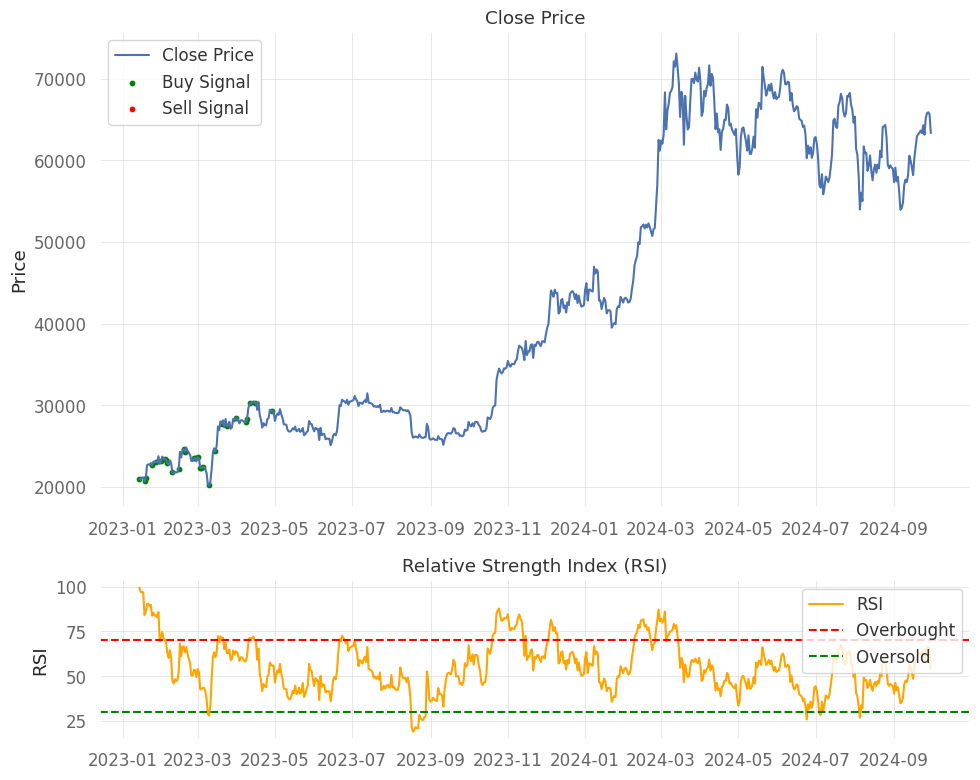

                    Strategy
------------------  ----------
Start Period        2023-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   180.56%
CAGR﹪              51.68%

Sharpe              1.28
Prob. Sharpe Ratio  98.01%
Sortino             2.06
Sortino/√2          1.46
Omega               1.27

Max Drawdown        -25.79%
Longest DD Days     200

Gain/Pain Ratio     0.27
Gain/Pain (1M)      2.43

Payoff Ratio        1.27
Profit Factor       1.27
Common Sense Ratio  1.57
CPC Index           0.8
Tail Ratio          1.24
Outlier Win Ratio   4.3
Outlier Loss Ratio  4.03

MTD                 11.09%
3M                  8.65%
6M                  -7.11%
YTD                 53.87%
1Y                  137.21%
3Y (ann.)           51.68%
5Y (ann.)           51.68%
10Y (ann.)          51.68%
All-time (ann.)     51.68%

Avg. Drawdown       -4.32%
Avg. Drawdown Days  15
Recovery Factor     4.7
Ulcer Index         0.1
Serenity Index      1.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


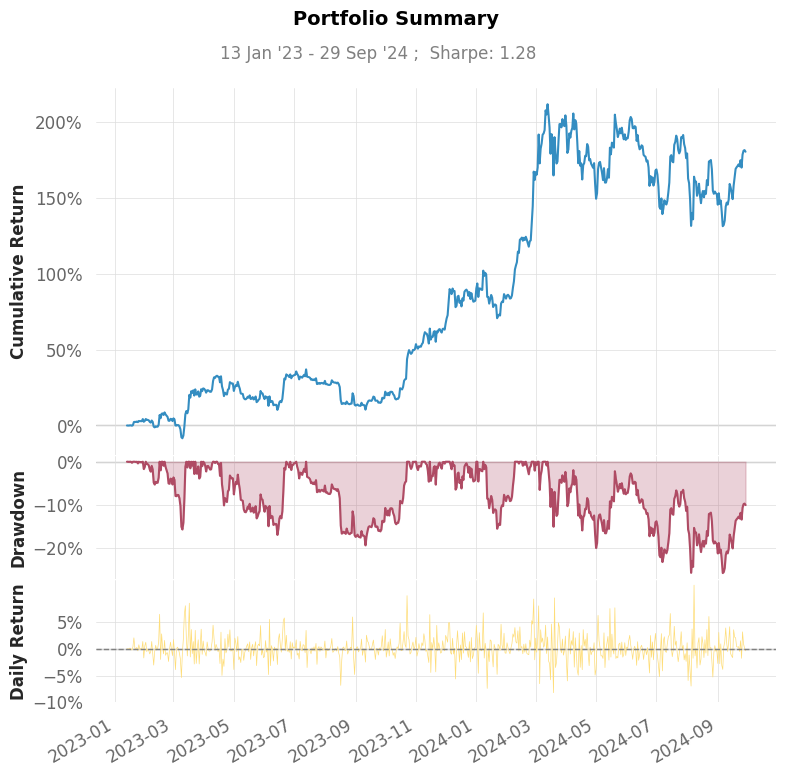

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


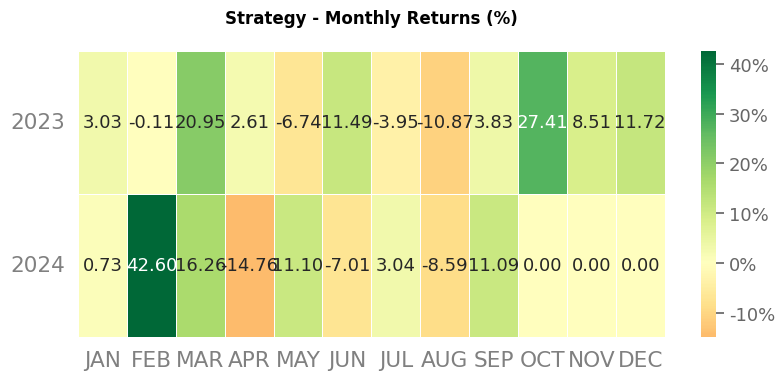

In [3]:
check_env(test_env)

portfolio_values = []
actions_data = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    test_env.render()
    portfolio_values.append(info['portfolio_value'])
    done = terminated or truncated

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)